# Predicting the customer spending amount based on customer characteristics for a direct marketing campaign.

In [59]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Importing the data
data = pd.read_csv(r"D:\BackupFolder\Data Science (Data)\data\DirectMarketing.csv")
data

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671


In [14]:
data["Age"].value_counts()

Middle    508
Young     287
Old       205
Name: Age, dtype: int64

In [15]:
data["History"].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [16]:
data.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [17]:
# Handelling the Missing Values
data['History'] = data["History"].fillna("No History")

In [18]:
data.isnull().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      1000 non-null   object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [21]:
# One Hot Encoding the Categorical Features
data2 = pd.get_dummies(data, columns=["Age", "Gender", "OwnHome", "Married", "Location", "History"], drop_first=True)

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Salary              1000 non-null   int64
 1   Children            1000 non-null   int64
 2   Catalogs            1000 non-null   int64
 3   AmountSpent         1000 non-null   int64
 4   Age_Old             1000 non-null   uint8
 5   Age_Young           1000 non-null   uint8
 6   Gender_Male         1000 non-null   uint8
 7   OwnHome_Rent        1000 non-null   uint8
 8   Married_Single      1000 non-null   uint8
 9   Location_Far        1000 non-null   uint8
 10  History_Low         1000 non-null   uint8
 11  History_Medium      1000 non-null   uint8
 12  History_No History  1000 non-null   uint8
dtypes: int64(4), uint8(9)
memory usage: 40.2 KB


In [25]:
features  = list(data2.columns)

In [26]:
features.remove("AmountSpent")

In [29]:
X = data2[features]
Y = data2["AmountSpent"]

In [30]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.27, random_state=11)

In [91]:
X_Train

array([[-0.55776095, -0.88976112, -1.33872963, ..., -0.56363954,
         1.98303617, -0.66749124],
       [-1.3986672 ,  0.07679486, -1.33872963, ...,  1.77418355,
        -0.50427724, -0.66749124],
       [-1.22852274,  0.07679486, -0.41677432, ...,  1.77418355,
        -0.50427724, -0.66749124],
       ...,
       [-0.21092803,  1.04335084, -0.41677432, ..., -0.56363954,
        -0.50427724,  1.498147  ],
       [ 0.10972883,  1.04335084, -1.33872963, ..., -0.56363954,
        -0.50427724,  1.498147  ],
       [ 0.41402564,  2.00990681, -0.41677432, ...,  1.77418355,
        -0.50427724, -0.66749124]])

In [32]:
model = LinearRegression()

In [36]:
model.fit(X_Train, Y_Train)

LinearRegression()

In [38]:
Y_Pred = model.predict(X_Test)

In [39]:
df1 = pd.DataFrame({"True": Y_Test, "Predicted" : Y_Pred})

In [40]:
df1

,True,Predicted
25,655,1435.654433
464,2710,2603.012482
372,587,593.937621
730,1748,1261.537767
757,445,578.823456
...,...,...
188,613,715.299648
845,1078,810.483565
331,915,903.327711
349,79,-405.409222


In [41]:
r2_score(Y_Test, Y_Pred)

0.7546167228552363

# Let's attempt feature scaling to enhance model accuracy

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(X_Train)

StandardScaler()

In [46]:
X_Train = scaler.transform(X_Train)

In [47]:
X_Test = scaler.transform(X_Test)

array([[-0.55776095, -0.88976112, -1.33872963, ..., -0.56363954,
         1.98303617, -0.66749124],
       [-1.3986672 ,  0.07679486, -1.33872963, ...,  1.77418355,
        -0.50427724, -0.66749124],
       [-1.22852274,  0.07679486, -0.41677432, ...,  1.77418355,
        -0.50427724, -0.66749124],
       ...,
       [-0.21092803,  1.04335084, -0.41677432, ..., -0.56363954,
        -0.50427724,  1.498147  ],
       [ 0.10972883,  1.04335084, -1.33872963, ..., -0.56363954,
        -0.50427724,  1.498147  ],
       [ 0.41402564,  2.00990681, -0.41677432, ...,  1.77418355,
        -0.50427724, -0.66749124]])

In [50]:
model.fit(X_Train, Y_Train)

LinearRegression()

In [51]:
r2_score(Y_Test, model.predict(X_Test))

0.7546167228552358

In [55]:
df2 = pd.DataFrame({"True": Y_Test, "Predicted" : model.predict(X_Test)})

In [56]:
df2

,True,Predicted
25,655,1435.654433
464,2710,2603.012482
372,587,593.937621
730,1748,1261.537767
757,445,578.823456
...,...,...
188,613,715.299648
845,1078,810.483565
331,915,903.327711
349,79,-405.409222


<Axes: xlabel='True', ylabel='Predicted'>

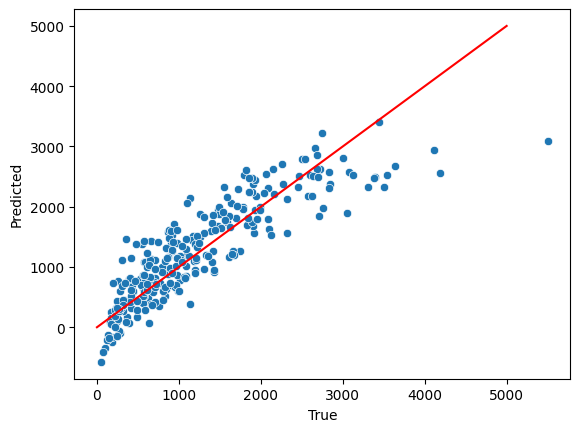

In [58]:
sns.scatterplot(data = df2, x = "True" , y = "Predicted")
sns.lineplot(x = [0, 5000], y = [0, 5000], color = 'red')

# Let's implement polynomial regression of degree 2 to enhance the model accuracy.

In [84]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(X_Train)
x_test_trans = poly.transform(X_Test)

In [85]:
model.fit(x_train_trans, Y_Train)

LinearRegression()

In [86]:
r2_score(Y_Test, model.predict(x_test_trans))

0.8195205931355528

Polynomial regression resulted in a significant accuracy improvement, increasing from 75% to 81%.

In [87]:
df2 = pd.DataFrame({"True": Y_Test, "Predicted" : model.predict(x_test_trans)})

In [88]:
df2

,True,Predicted
25,655,760.53125
464,2710,3200.09375
372,587,497.06250
730,1748,1460.65625
757,445,699.59375
...,...,...
188,613,631.59375
845,1078,923.84375
331,915,1282.06250
349,79,-44.59375


<Axes: xlabel='True', ylabel='Predicted'>

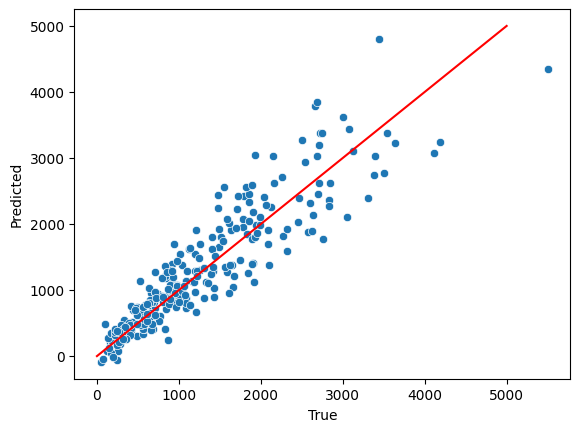

In [89]:
sns.scatterplot(data = df2, x = "True" , y = "Predicted")
sns.lineplot(x = [0, 5000], y = [0, 5000], color = 'red')